In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Boston.csv")

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1.00000,2.00000,3.00000,4.00000,5.00000
crim,0.00632,0.02731,0.02729,0.03237,0.06905
zn,18.00000,0.00000,0.00000,0.00000,0.00000
indus,2.31000,7.07000,7.07000,2.18000,2.18000
chas,0.00000,0.00000,0.00000,0.00000,0.00000
nox,0.53800,0.46900,0.46900,0.45800,0.45800
rm,6.57500,6.42100,7.18500,6.99800,7.14700
age,65.20000,78.90000,61.10000,45.80000,54.20000
dis,4.09000,4.96710,4.96710,6.06220,6.06220
rad,1.00000,2.00000,2.00000,3.00000,3.00000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


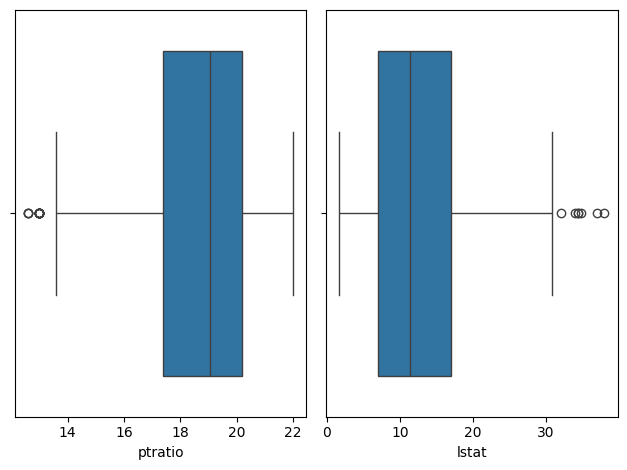

In [5]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

In [6]:
def removeoutlier(df,var):
    q1=df[var].quantile(0.25)
    q3=df[var].quantile(0.75)
    IQR = q3-q1
    high = q3 + 1.5*IQR
    low = q1 - 1.5*IQR

    df = df[((df[var]>=low ) & (df[var]<=high)) ]
    return df
        

In [7]:
df = removeoutlier(df,'ptratio')

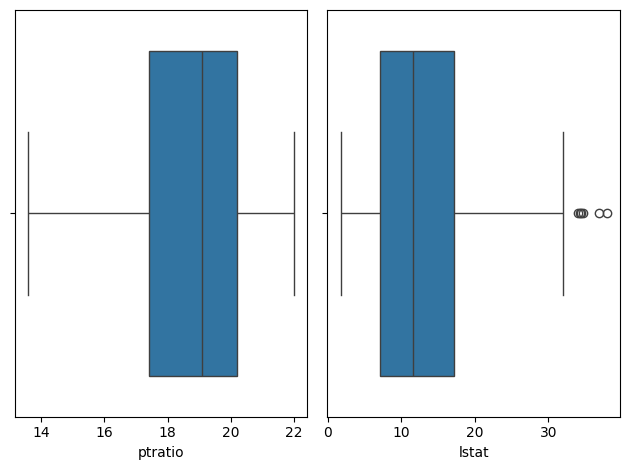

In [8]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

In [25]:
def buildModel(X,Y):
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.20,random_state = 0)

    from sklearn.linear_model import LinearRegression 
    model = LinearRegression()
    model = model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    ypred_train = model.predict(xtrain)
    
    from sklearn.metrics import mean_absolute_error
    print("MAE",mean_absolute_error(ytest,ypred))
    print("model score" , model.score(xtest,ytest))
    

    # Visualize regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(ytest, ypred, edgecolors=(0, 0, 0))
    plt.scatter(ytrain, ypred_train, edgecolors=(0, 0, 0))
    plt.xlabel("Actual MEDV")
    plt.ylabel("Predicted MEDV")
    plt.title("Actual vs Predicted House Prices")
    plt.show()




In [1]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

NameError: name 'plt' is not defined

In [11]:
# Find top correlations with 'target_column'
df.corr()['medv'].abs().sort_values(ascending=False)


medv          1.000000
lstat         0.743389
rm            0.664089
nox           0.473486
indus         0.462905
tax           0.457212
ptratio       0.453797
age           0.414797
crim          0.391368
rad           0.374980
zn            0.352029
black         0.334617
dis           0.288708
Unnamed: 0    0.238881
chas          0.198515
Name: medv, dtype: float64

In [26]:
X = df[['lstat','rm']]
Y = df[['medv']]

MAE 4.335715032669314
model score 0.46211494675765585


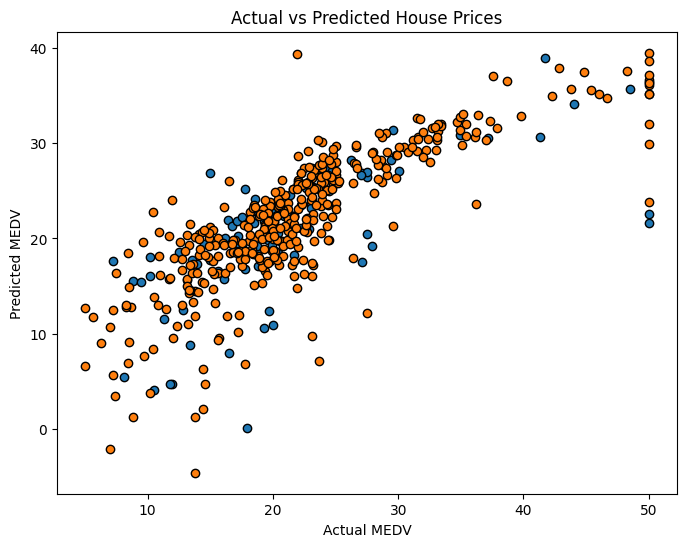

In [27]:
buildModel(X,Y)

In [ ]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='rm', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

In [ ]:
df = removeoutlier(df,'rm')
df = removeoutlier(df,'medv')

In [ ]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='medv', ax=axes[1])
fig.tight_layout()
plt.show()

In [ ]:
X = df[['lstat','rm']]
Y = df[['medv']]
buildModel(X,Y)

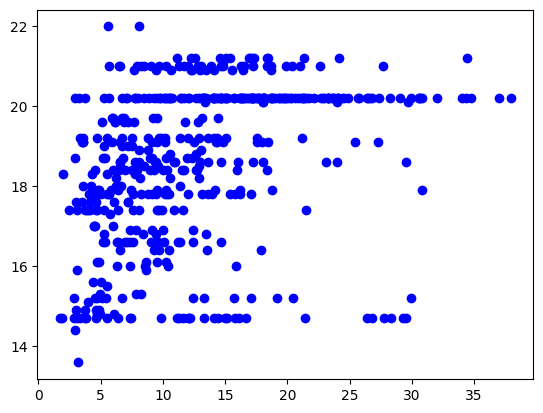

In [22]:
# MAE 4.335715032669314
# model score 0.46211494675765585
x = df[['lstat']]
y = df[['ptratio']]
plt.scatter(x,y, color='blue', label='Actual data')


MAE 1.5013919496194712
model score 0.017544434889526728


ValueError: x and y must have same first dimension, but have shapes (491, 1) and (99, 1)

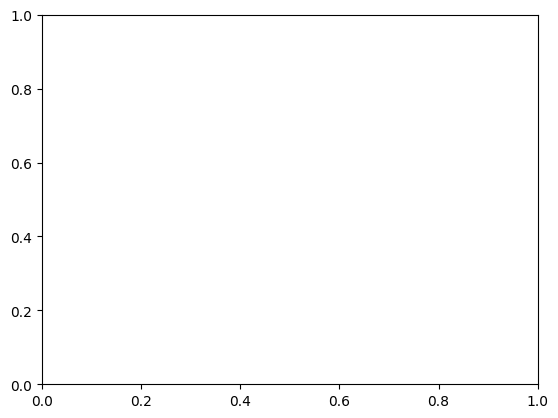

In [23]:
buildModel(x,y)

In [19]:
df.shape

(491, 15)

In [20]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [21]:
print(x.shape)

print(y.shape)

(491, 1)
(491, 1)
